# Importowane bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Wczytanie danych

In [2]:
# Wczytanie danych
file_path = "data/airplane_price_dataset.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Poprawienie nazwy kolumn
df.columns = [
    "Model", "Production_Year", "Num_Engines", "Engine_Type", "Capacity", 
    "Range_km", "Fuel_Consumption_L_per_hour", "Hourly_Maintenance_Cost", 
    "Age", "Sales_Region", "Price_USD"
]

# Podgląd danych
print(df.head())
print(df.info())


               Model  Production_Year  Num_Engines Engine_Type  Capacity  \
0  Bombardier CRJ200             1987            2    Turbofan        50   
1  Bombardier CRJ200             1997            2    Turbofan        50   
2        Airbus A320             1988            2    Turbofan       180   
3         Boeing 737             2023            2    Turbofan       162   
4         Cessna 172             1985            1      Piston         4   

   Range_km  Fuel_Consumption_L_per_hour  Hourly_Maintenance_Cost  Age  \
0      3000                        14.36                  2185.43   36   
1      3000                         4.03                  1202.08   26   
2      6300                        13.26                   761.38   35   
3      5700                        14.61                   592.63    0   
4      1285                        18.49                  4245.99   38   

     Sales_Region     Price_USD  
0            Asya  1.285708e+07  
1          Avrupa  1.391406e+0


# Czyszczenie danych

In [3]:
# Naprawa problemów z kodowaniem znaków
df["Sales_Region"] = df["Sales_Region"].apply(lambda x: x.encode("latin1").decode("utf-8") if isinstance(x, str) else x)
df["Age"] = 2023 - df["Production_Year"]

# Sprawdzenie brakujących wartości
print("Brakujące wartości:\n", df.isnull().sum())

# Słownik do zamiany nazw regionów
region_translation = {
    "Asya": "Asia",
    "Avrupa": "Europe",
    "Avustralya": "Australia",
    "Güney Amerika": "South America",
    "Afrika": "Africa",
    "Kuzey Amerika": "North America"
}

# Zamiana nazw regionów
df["Sales_Region"] = df["Sales_Region"].replace(region_translation)


# Sprawdzenie unikalnych wartości w kolumnach kategorycznych
print("\nTypy silników:", df["Engine_Type"].unique())
print("Regiony sprzedaży:", df["Sales_Region"].unique())

# Konwersja danych kategorycznych na liczby
df = pd.get_dummies(df, columns=["Engine_Type", "Sales_Region"], drop_first=True)

# Podgląd danych po czyszczeniu
print("\nDane po czyszczeniu:")
print(df.head())


Brakujące wartości:
 Model                          0
Production_Year                0
Num_Engines                    0
Engine_Type                    0
Capacity                       0
Range_km                       0
Fuel_Consumption_L_per_hour    0
Hourly_Maintenance_Cost        0
Age                            0
Sales_Region                   0
Price_USD                      0
dtype: int64

Typy silników: ['Turbofan' 'Piston']
Regiony sprzedaży: ['Asia' 'Europe' 'Australia' 'South America' 'Africa' 'North America']

Dane po czyszczeniu:
               Model  Production_Year  Num_Engines  Capacity  Range_km  \
0  Bombardier CRJ200             1987            2        50      3000   
1  Bombardier CRJ200             1997            2        50      3000   
2        Airbus A320             1988            2       180      6300   
3         Boeing 737             2023            2       162      5700   
4         Cessna 172             1985            1         4      1285   

   Fuel_


# Analiza wpływu kluczowych cech na cenę samolotu

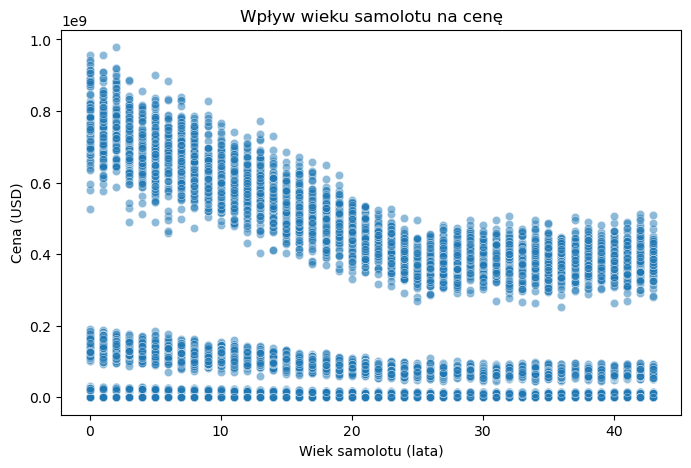

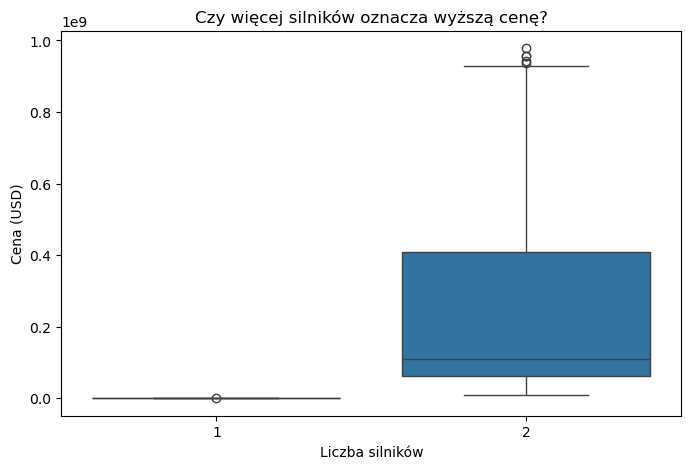

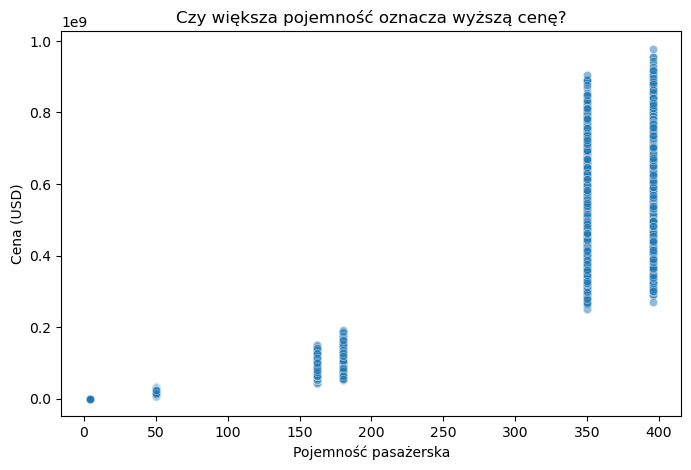

In [4]:
# Wpływ wieku samolotu na cenę
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Price_USD"], alpha=0.5)
plt.xlabel("Wiek samolotu (lata)")
plt.ylabel("Cena (USD)")
plt.title("Wpływ wieku samolotu na cenę")
plt.show()

# Wpływ liczby silników na cenę
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Num_Engines"], y=df["Price_USD"])
plt.xlabel("Liczba silników")
plt.ylabel("Cena (USD)")
plt.title("Czy więcej silników oznacza wyższą cenę?")
plt.show()

# Wpływ pojemności pasażerskiej na cenę
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Capacity"], y=df["Price_USD"], alpha=0.5)
plt.xlabel("Pojemność pasażerska")
plt.ylabel("Cena (USD)")
plt.title("Czy większa pojemność oznacza wyższą cenę?")
plt.show()



# Tworzenie i ocena modelu

In [5]:
# Cechy do modelu
features = ["Age", "Num_Engines", "Capacity", "Range_km", "Fuel_Consumption_L_per_hour", 
            "Hourly_Maintenance_Cost", "Engine_Type_Turbofan", "Sales_Region_Asia", 
            "Sales_Region_Europe", "Sales_Region_Australia", "Sales_Region_South America", "Sales_Region_North America"]

X = df[features]
y = df["Price_USD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Przewidywanie ceny na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Wyniki modelu
print(f"Średni błąd MAE: {mae:.2f} USD")
print(f"R² modelu: {r2:.4f}")


Średni błąd MAE: 17221478.53 USD
R² modelu: 0.9797



# Wizualizacja wyników

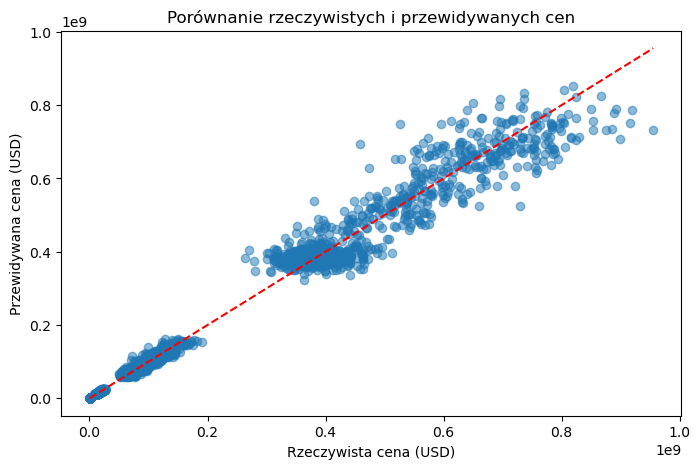

In [6]:
# Wykres: Rzeczywiste ceny vs Przewidywane ceny
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Rzeczywista cena (USD)")
plt.ylabel("Przewidywana cena (USD)")
plt.title("Porównanie rzeczywistych i przewidywanych cen")
plt.show()